# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Lecture 11 </span>

Test of NNs on a data set of labeled data $(x,y)$, generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, possibly unknown function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

##  <span style="color:blue"> Exercise 11.1

Linear fit

$$
f(x)=2x+1
$$

$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$


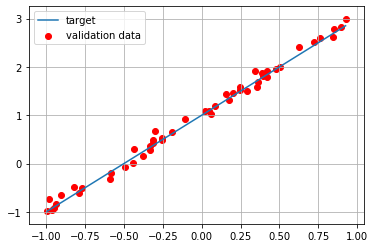

In [2]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'

# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect
N_train = 500
N_valid = int(N_train/10)
N_epoch = 40
sigma = 0.1 # noise standard deviation

import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)  # 1000 unordered random numbers in [-1,1]
x_valid = np.random.uniform(-1, 1, N_valid)    # 10 random numbers in [-1,1], ordered below
x_valid.sort()
y_target = m*x_valid + b # ideal (target) linear function

y_train = np.random.normal(m*x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m*x_valid + b, sigma)

# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [4]:
# fit the model using training dataset
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=N_epoch,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/40
16/16 [==============================] - 0s 11ms/step - loss: 0.7736 - mse: 0.7736 - val_loss: 0.5920 - val_mse: 0.5920
Epoch 2/40
16/16 [==============================] - 0s 2ms/step - loss: 0.4181 - mse: 0.4181 - val_loss: 0.3326 - val_mse: 0.3326
Epoch 3/40
16/16 [==============================] - 0s 2ms/step - loss: 0.2302 - mse: 0.2302 - val_loss: 0.1922 - val_mse: 0.1922
Epoch 4/40
16/16 [==============================] - 0s 2ms/step - loss: 0.1301 - mse: 0.1301 - val_loss: 0.1158 - val_mse: 0.1158
Epoch 5/40
16/16 [==============================] - 0s 2ms/step - loss: 0.0770 - mse: 0.0770 - val_loss: 0.0733 - val_mse: 0.0733
Epoch 6/40
16/16 [==============================] - 0s 2ms/step - loss: 0.0483 - mse: 0.0483 - val_loss: 0.0492 - val_mse: 0.0492
Epoch 7/40
16/16 [==============================] - 0s 2ms/step - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0352 - val_mse: 0.0352
Epoch 8/40
16/16 [==============================] - 0s 2ms/step - loss: 0.0238 - mse: 0.0

In [5]:
# evaluate model
score = model.evaluate(x_train, y_train, batch_size=32, verbose=1)

# print performance
print('VALIDATION AGAINST Y_TRAIN')
print('Loss:', score[0])
#print('Test accuracy:', score[1])

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print('VALIDATION AGAINST Y_VALID')
print('Loss:', score[0])
#print('Test accuracy:', score[1])

# evaluate model with the exact curve
#score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
#print('VALIDATION AGAINST Y_TARGET')
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

16/16 [==============================] - 0s 798us/step - loss: 0.0098 - mse: 0.0098
VALIDATION AGAINST Y_TRAIN
Loss: 0.00978351105004549
2/2 [==============================] - 0s 3ms/step - loss: 0.0111 - mse: 0.0111
VALIDATION AGAINST Y_VALID
Loss: 0.01113362517207861


In [6]:
# return weights
W = model.get_weights()
print("a: ", W[0])
print("b: ", W[1])

a:  [[2.006703]]
b:  [0.9891969]


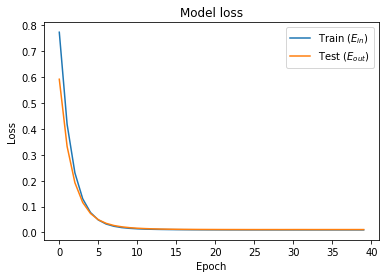

In [7]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train ($E_{in}$)', 'Test ($E_{out}$)'], loc='best')
plt.show()

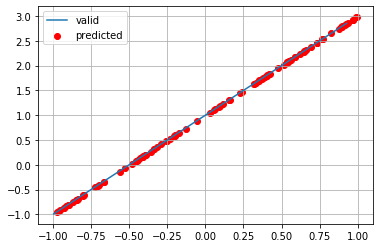

In [8]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r',label="predicted")
plt.plot(x_valid, y_target,label="valid")
plt.grid(True)
plt.legend()
plt.show()

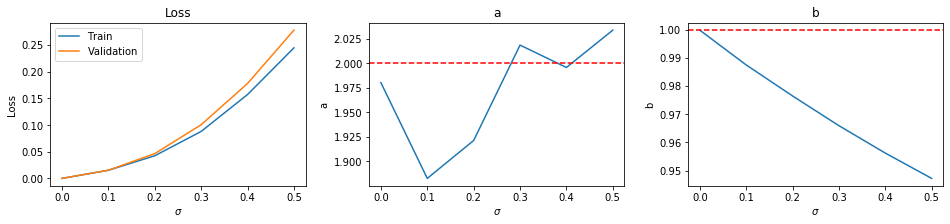

In [9]:
import numpy as np
import math
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.lines as lines

Ndata = 6
absc = np.zeros(Ndata)
testloss = np.zeros(Ndata)
valloss = np.zeros(Ndata)
a = np.zeros(Ndata)
b = np.zeros(Ndata)

file = open("./sigma_Ntrain500_epoch30")
line = file.readlines()
for i in range(Ndata):
    data=line[i].split(" ")
    absc[i]=data[0]
    testloss[i]=data[1]
    valloss[i]=data[2]
    a[i]=data[3]
    b[i]=data[4]

plt.figure(figsize=(16, 3))

plt.subplot(1,3,1)
plt.plot(absc,testloss,label='Train')
plt.plot(absc,valloss,label='Validation')
plt.xlabel("$\sigma$")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss")

plt.subplot(1,3,2)
plt.plot(absc,a)
plt.xlabel("$\sigma$")
plt.ylabel("a")
plt.axhline(2,color='r',linestyle='dashed')
plt.title("a")

plt.subplot(1,3,3)
plt.plot(absc,b)
plt.xlabel("$\sigma$")
plt.ylabel("b")
plt.axhline(1,color='r',linestyle='dashed')
plt.title("b")

plt.subplots_adjust(wspace=0.25)
plt.show()

Increasing $\sigma$, loss on both training and validation set increases and so does their gap. The coefficient $a$ is predicted more or less correctly with irregular behaviour, the intercept $b$ more and more incorrectly (run with $N_{train}=500$ and 30 epochs).

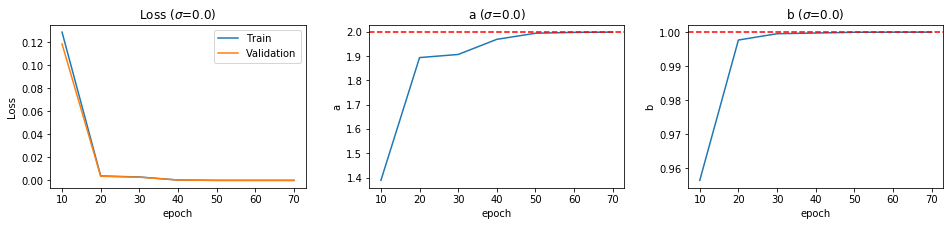

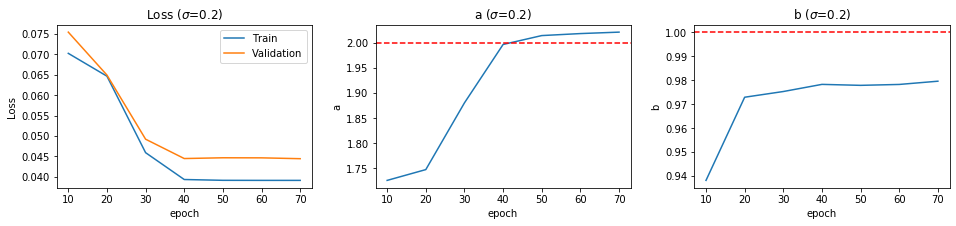

In [10]:
Ndata = 7
absc = np.zeros(Ndata)
testloss = np.zeros(Ndata)
valloss = np.zeros(Ndata)
a = np.zeros(Ndata)
b = np.zeros(Ndata)

file = open("./epoch_sigma0.0_Ntrain500")
line = file.readlines()
for i in range(Ndata):
    data=line[i].split(" ")
    absc[i]=data[0]
    testloss[i]=data[1]
    valloss[i]=data[2]
    a[i]=data[3]
    b[i]=data[4]

plt.figure(figsize=(16, 3))

plt.subplot(1,3,1)
plt.plot(absc,testloss,label='Train')
plt.plot(absc,valloss,label='Validation')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss ($\sigma$=0.0)")

plt.subplot(1,3,2)
plt.plot(absc,a)
plt.xlabel("epoch")
plt.ylabel("a")
plt.axhline(2,color='r',linestyle='dashed')
plt.title("a ($\sigma$=0.0)")

plt.subplot(1,3,3)
plt.plot(absc,b)
plt.xlabel("epoch")
plt.ylabel("b")
plt.axhline(1,color='r',linestyle='dashed')
plt.title("b ($\sigma$=0.0)")

plt.subplots_adjust(wspace=0.25)
plt.show()

file = open("./epoch_sigma0.2_Ntrain500")
line = file.readlines()
for i in range(Ndata):
    data=line[i].split(" ")
    absc[i]=data[0]
    testloss[i]=data[1]
    valloss[i]=data[2]
    a[i]=data[3]
    b[i]=data[4]

plt.figure(figsize=(16, 3))

plt.subplot(1,3,1)
plt.plot(absc,testloss,label='Train')
plt.plot(absc,valloss,label='Validation')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss ($\sigma$=0.2)")

plt.subplot(1,3,2)
plt.plot(absc,a)
plt.xlabel("epoch")
plt.ylabel("a")
plt.axhline(2,color='r',linestyle='dashed')
plt.title("a ($\sigma$=0.2)")

plt.subplot(1,3,3)
plt.plot(absc,b)
plt.xlabel("epoch")
plt.ylabel("b")
plt.axhline(1,color='r',linestyle='dashed')
plt.title("b ($\sigma$=0.2)")

plt.subplots_adjust(wspace=0.25)
plt.show()

Fixing $N_{train}=500$ and increasing the epochs, losses on both training and validation sets saturate to costant values. The same happens for the predictions of the coefficients.

A nonzero $\sigma$ does not qualitatively alter such trends. The differences lie in coefficients being predicted less precisely and the validation loss being non-negligibly higher than for training.

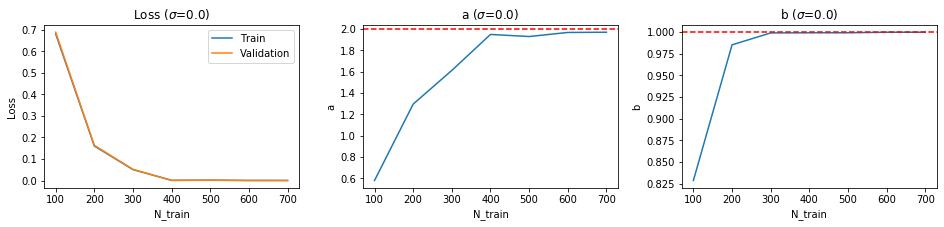

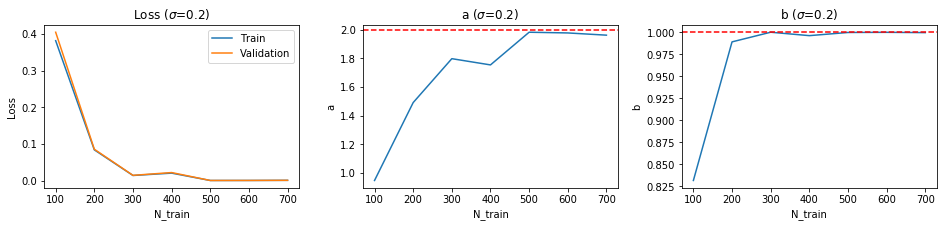

In [11]:
file = open("./Ntrain_sigma0.0_epoch30")
line = file.readlines()
for i in range(Ndata):
    data=line[i].split(" ")
    absc[i]=data[0]
    testloss[i]=data[1]
    valloss[i]=data[2]
    a[i]=data[3]
    b[i]=data[4]

plt.figure(figsize=(16, 3))

plt.subplot(1,3,1)
plt.plot(absc,testloss,label='Train')
plt.plot(absc,valloss,label='Validation')
plt.xlabel("N_train")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss ($\sigma$=0.0)")

plt.subplot(1,3,2)
plt.plot(absc,a)
plt.xlabel("N_train")
plt.ylabel("a")
plt.axhline(2,color='r',linestyle='dashed')
plt.title("a ($\sigma$=0.0)")

plt.subplot(1,3,3)
plt.plot(absc,b)
plt.xlabel("N_train")
plt.ylabel("b")
plt.axhline(1,color='r',linestyle='dashed')
plt.title("b ($\sigma$=0.0)")

plt.subplots_adjust(wspace=0.25)
plt.show()

file = open("./Ntrain_sigma0.2_epoch30")
line = file.readlines()
for i in range(Ndata):
    data=line[i].split(" ")
    absc[i]=data[0]
    testloss[i]=data[1]
    valloss[i]=data[2]
    a[i]=data[3]
    b[i]=data[4]

plt.figure(figsize=(16, 3))

plt.subplot(1,3,1)
plt.plot(absc,testloss,label='Train')
plt.plot(absc,valloss,label='Validation')
plt.xlabel("N_train")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss ($\sigma$=0.2)")

plt.subplot(1,3,2)
plt.plot(absc,a)
plt.xlabel("N_train")
plt.ylabel("a")
plt.axhline(2,color='r',linestyle='dashed')
plt.title("a ($\sigma$=0.2)")

plt.subplot(1,3,3)
plt.plot(absc,b)
plt.xlabel("N_train")
plt.ylabel("b")
plt.axhline(1,color='r',linestyle='dashed')
plt.title("b ($\sigma$=0.2)")

plt.subplots_adjust(wspace=0.25)
plt.show()

Roughly as for the case above (here with 30 epochs).

#### *Overall*

- With no surprise, a nonzero sigma complicates the efficiency of our NN. 
- Estimates and losses converge rather quickly with the number of epochs for fixed $N_{train}$...
- ...while they are much more sensitive to $N_{train}$ for fixed number of epochs